In [6]:
%pip install -r ../requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached pyworld-0.3.4.tar.gz (251 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 14.4 MB/s eta 0:00:00a 0:00:01
  Using cached librosa-0.10.1-py3-none-any.whl (253 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached Cython-3.0.9-cp39-cp39-macosx_10_9_x86_64.whl (3.1 MB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 15.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 

In [7]:
import os
import sys

import numpy as np
import seaborn as sns

repos_vt_dir = os.path.dirname(os.getcwd())

sys.path.append(repos_vt_dir)
import audio_utils as au

repos_dir = os.path.dirname(repos_vt_dir)
print(repos_vt_dir)


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation


In [11]:
wav_path = os.path.join(repos_vt_dir, 'my_recordings', 'eauae.wav')
sampling_rate = 16000

## WORLD vocoder
https://github.com/JeremyCCHsu/Python-Wrapper-for-World-Vocoder?tab=readme-ov-file

In [12]:
## load wav file.
x = au.load_wav(wav_path)

## extract features
# f0: pitch
# sp: spectrogram
# ap: aperiodicity
f0, sp, ap = au.extract_features(x)
print(ap)
## synthesize an utterance using the parameters
y = au.synthesize(f0, sp, ap)
au.disp_wav(y)

## output signal to wav file.
resyn_path = wav_path.replace('.wav', '_resyn.wav')
au.write_wav(resyn_path, y)

/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/audio_utils.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(wav_path, sr=sampling_rate)
/usr/local/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


## make robotic voice by changng parameters.

In [13]:
## change pitch.
# try changing pitch higher/lower and see what kind of voice it will be.
pitch_ratio = 0.3

y = au.synthesize(f0 * pitch_ratio, sp, ap)
au.disp_wav(y)

<Axes: >

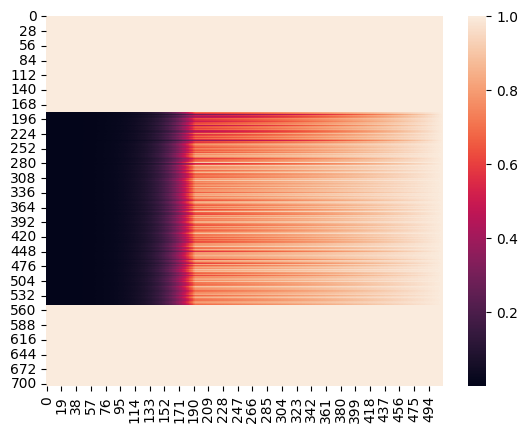

In [8]:
## change ap.
# ap: n_frames x 513

# see original ap.
sns.heatmap(ap)

In [14]:
## change ap. 
# try changing ap and see what kind of voice it will be.
ap_ratio = 0.9
ap2 = np.ones(np.shape(ap)) * ap_ratio

y = au.synthesize(f0, sp, ap2)
au.disp_wav(y)

In [29]:
import os
    
for file in os.listdir('../my_recordings'):
    filename = os.fsdecode(file)
    print(file)
    if filename.endswith(".wav"):
        wav_path = os.path.join(repos_vt_dir, 'my_recordings', filename)
        
        print(wav_path)
        x = au.load_wav(wav_path)
        f0, sp, ap = au.extract_features(x)

        pitch_ratio = 0.3
        y = au.synthesize(f0 * pitch_ratio, sp, ap)
        au.disp_wav(y)

        resyn_path = wav_path = os.path.join(repos_vt_dir, 'pitch_recordings', f'pitch{pitch_ratio}'+filename)
        print(resyn_path)
        au.write_wav(resyn_path, y)

aaaa.wav
/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/my_recordings/aaaa.wav


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/audio_utils.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(wav_path, sr=sampling_rate)
/usr/local/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/pitch_recordings/pitch0.3aaaa.wav
grunting.wav
/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/my_recordings/grunting.wav


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/pitch_recordings/pitch0.3grunting.wav
.DS_Store
oo.wav
/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/my_recordings/oo.wav


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/pitch_recordings/pitch0.3oo.wav
uu.wav
/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/my_recordings/uu.wav


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/pitch_recordings/pitch0.3uu.wav
aha.wav
/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/my_recordings/aha.wav


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/pitch_recordings/pitch0.3aha.wav
eauae.wav
/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/my_recordings/eauae.wav


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/pitch_recordings/pitch0.3eauae.wav
aha2.wav
/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/my_recordings/aha2.wav


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/pitch_recordings/pitch0.3aha2.wav
ojoj.wav
/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/my_recordings/ojoj.wav


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/pitch_recordings/pitch0.3ojoj.wav
mmm.wav
/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/my_recordings/mmm.wav


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/pitch_recordings/pitch0.3mmm.wav
ioio.wav
/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/my_recordings/ioio.wav


/Users/polabedzka/Desktop/ATLAS/SEM6/thesis/voice_transformation/pitch_recordings/pitch0.3ioio.wav
